## Tarea 1 del curso CM-072

* Nombre y apellidos: Bitzer Nazaret Arotoma Bacilio
* Fecha de presentación: 11 de setiembre.

## Lista de preguntas:

1 . Responde de acuerdo a los conceptos hechos en clase las siguientes preguntas:
   * Supongamos que tenemos la tarea de construir un sistema que pueda distinguir  correo no deseado o spam. ¿Qué crees que hay en un correo electrónico no deseado que nos permite saber que es spam? ¿Cómo puede la computadora detectar spam a través de un análisis sintáctico?. ¿Qué te gustaría que hiciera la computadora si detecta un correo electrónico que es spam?, ¿eliminarlo automáticamente, moverlo a un archivo diferente o simplemente resaltarlo en la pantalla?.
   
   * ¿Cómo se puede predecir el siguiente comando a ser escrito por un usuario? ¿O la próxima página de la que descargará información en la Web? ¿Cuándo sería útil tal predicción? ¿Cuándo no?.

##### Respuesta 1:
    
  * Este es un problema fundamentalmente de clasificación, la cual tiene como característica generar un regla general que correlacione los datos de observación. En un correo electrónico no deseado se pueden distinguir patrones inusuales como son los caracteres especiales (%&#..), textos en mayúscula, números similares a telefonos o cuentas bancarias. La detección de un correo spam se puede realizar a través de determinadas reglas de expresiones regulares que se analizará en cada mensaje nuevo. Al detectar un correo spam sería almacenarlo en una carpeta de correos no deseados para que el usuario posteriormente pueda ver quienes son los emisores y bloquearlos si se generan constantemente. 
  * Se puede predecir el siguiente comando relacionando comandos anteriores y la frecuencias con las que ingresa estos, y generando relaciones predeterminadas entre los comandos ingresados por el usuario constantemente como ejemplo al generar una conversación siempre empieza con un hola. La predicción de la próxima página es algo complejo ya que de por sí son miles de páginas para un determinado tema y predecir cual sera la pagina de tu elección tendría que estar ya registrado en tu usuario, es útil la predicción cuando el usuario es nuevo y no sabe opta por aceptar la predicción que se genera. No sería útil y que su predicción no sería del todo aceptable y te genera mayor confusión dirigiéndose a enlaces que no deseabas.



2 . ¿Puedes predecir las especies de un iris usando medidas de pétalos y sépalos?

   * Lee los datos del conjunto predeterminado `iris` en un DataFrame de Pandas, incluyendo los nombres de las columnas.
   * Recolecta  información básica sobre los datos `iris`  utilizando pandas.
   * Utiliza la clasificación, [dividir-aplicar-combinar](https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html) y  visualización para buscar las diferencias entre las especies.

   * Escribe un conjunto de reglas que podrían usarse para predecir especies en base a las mediciones de iris.
   * Define una función que acepte una fila de datos y devuelva una especie pronosticada. Luego, usa esa función para hacer predicciones para todas las filas de datos existentes y verifique la precisión de sus predicciones.


In [1]:
#Leer datos en un DataFrame de Pandas
from sklearn import datasets
iris = datasets.load_iris()
import pandas as pd
data = pd.DataFrame(iris.data, columns= ['S_L','S_W','P_L','P_W'])
data['target'] = iris.target
data.target.replace( [0, 1, 2], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],inplace=True)
data.head(10)


,S_L,S_W,P_L,P_W,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
#Informacion de la data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
S_L       150 non-null float64
S_W       150 non-null float64
P_L       150 non-null float64
P_W       150 non-null float64
target    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,S_L,S_W,P_L,P_W
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
#Clasificación dividir-aplicar-combinar
#split
data_groups = data.groupby('target')
#Apply
data_groups.describe()

P_L                                                P_W  \
                count   mean       std  min  25%   50%    75%  max count   
target                                                                     
Iris-setosa      50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9  50.0   
Iris-versicolor  50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1  50.0   
Iris-virginica   50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9  50.0   

                       ...   S_L        S_W                                    \
                  mean ...   75%  max count   mean       std  min    25%  50%   
target                 ...                                                      
Iris-setosa      0.244 ...   5.2  5.8  50.0  3.418  0.381024  2.3  3.125  3.4   
Iris-versicolor  1.326 ...   6.3  7.0  50.0  2.770  0.313798  2.0  2.525  2.8   
Iris-virginica   2.026 ...   6.9  7.9  50.0  2.974  0.322497  2.2  2.800  3.0   

                             
                   75%  max  
target                       
Iris-setosa      3.675  4.4  
Iris-versicolor  3.000  3.4  
Iris-virginica   3.175  3.8  

[3 rows x 32 columns]

In [4]:
data_mean = data_groups.mean().reset_index()
data_mean

,target,S_L,S_W,P_L,P_W
0,Iris-setosa,5.006,3.418,1.464,0.244
1,Iris-versicolor,5.936,2.770,4.260,1.326
2,Iris-virginica,6.588,2.974,5.552,2.026


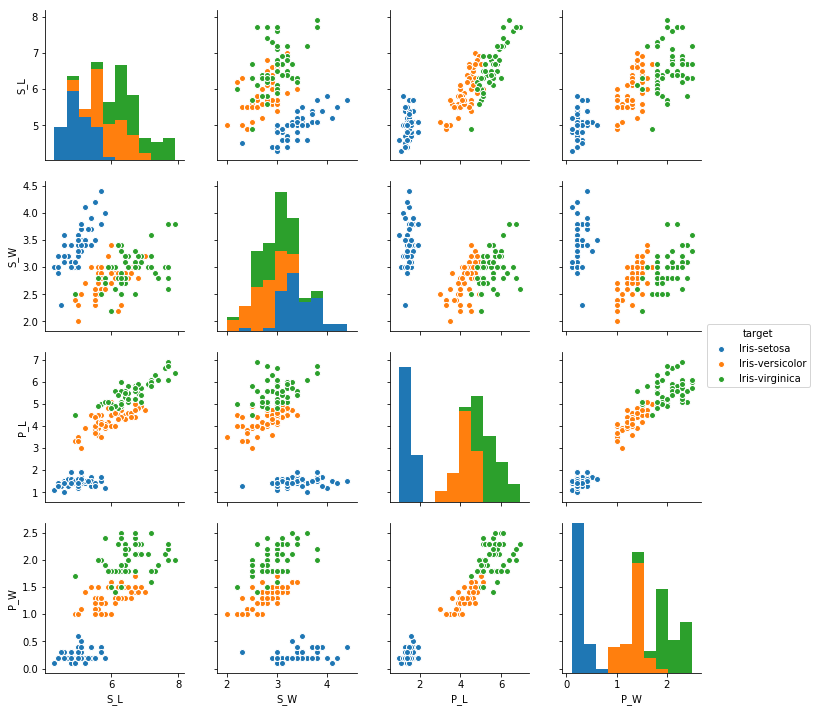

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.pairplot(data, hue='target')

In [6]:
"""
    Observamos la gráfica P_L vs P_W se observa que hay límites entre las 3 categorías
    se dividen horizontalmente de acuerdo a P_L mas no verticalmente a excepción de la 
    intersección de la iris-versicolor e iris-virginica
"""

#Buscamos el máximo y mínimo de las 3 categorias
#Creamos nuestas condiciones 
data1 = pd.DataFrame(iris.data, columns= ['S_L','S_W','P_L','P_W'])
data1['target'] = iris.target
max_pl = data1[['P_L','target']].groupby(['target']).max().reset_index()
min_pl = data1[['P_L','target']].groupby(['target']).min().reset_index()
# Clasificamos si pertenece o no a los intervalos de l_petalo y w_petalo
def iris_classification(pW):
    #Si es menor al maximo petal length de la categoria setosa
    if pW <= max_pl.P_L[0]:
        return 0
    elif max_pl.P_L[0]<=pW <=(max_pl.P_L[1]+min_pl.P_L[2])/2 :
        return 1
    else:
        return 2
count=0
for i in range(140):
    if iris_classification(data1.iloc[i]['P_L']) == data1.iloc[i]['target']:
        count +=1
print("score : ",(count*100)/140.0)
    

score :  95.0


3 . Sea el siguiente código de generación de datos:

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

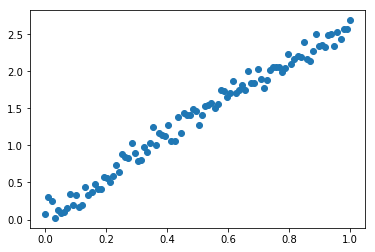

In [8]:
# Recolectamos datos artificiales
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

Usando los siguientes datos y scikit learn, desarrolla los siguientes pasos descritos en clase, para una regresión lineal:

* Escoger un modelo
* Elegir modelo de hiperparámetros
* Organiza los datos en una matriz de características y vector objetivo.
* Fija el modelo a tus datos.
* Predecir etiquetas para datos desconocidos.

Score :  0.9754059347608407


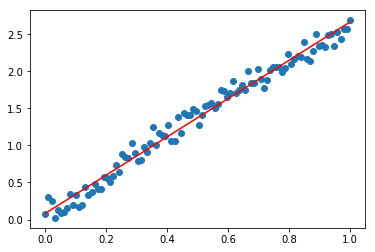

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#Elegimos el modelo de hiperparámetros
lr = LinearRegression(normalize=True)
X_train = x
Y_train = y
#fit_transform espera una matriz 2D
#Transformamos la matrix X_train
#X_train matrix de caracteristicas
X_train = X_train.reshape((X_train.shape[0], 1))

#Fijamos el modelo a la data
lr.fit(X_train, Y_train)


X_test = np.linspace(0, 1, 30)
Y_test = np.sin(X_test)*3 + np.random.normal(0, 0.1, 30)
X_test = X_test.reshape((X_test.shape[0], 1))
print("Score : ",lr.score(X_test, Y_test))

Y_linea = lr.predict(X_train)
plt.plot(x, y, 'o', x, Y_linea, '-r');

4 . Realiza los mismos pasos para el conjunto  de datos de scikit learn  [load_diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [10]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [11]:
data.keys()

dict_keys(['target', 'feature_names', 'DESCR', 'data'])

In [12]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [13]:
X = data['data']
y = data['target']
X.shape, y.shape

((442, 10), (442,))

In [14]:
from sklearn.model_selection import train_test_split
#Elegimos el modelo
lr2 = LinearRegression(normalize=True)
#Organizamos los datos en una matriz de caracteristicas y un vector objetivo
#Dividimos la data en 80% para el entrenamiento y 20% para la prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

#Fijamos el modelo a nuestra data
lr.fit(X_train, Y_train)
print("Score : ",lr.score(X_test, Y_test))


Score :  0.4977273204556125


5 (Obligatoria). Lee el siguiente artículo [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html), responde las siguientes preguntas:

* En el ejemplo Party Registration, ¿cuáles son las características? ¿Cuál es la respuesta? ¿Es  un problema de regresión o clasificación?.

* Conceptualmente, ¿cómo se aplica KNN a este problema para hacer una predicción?
* ¿Cómo se relacionan las cuatro visualizaciones en la sección 3 entre sí?. Cambia el valor de **k** utilizando el control deslizante y explica por que  cambió  las visualizaciones.
* En las figuras 4 y 5, ¿qué significan los colores más claros en comparación con los colores más oscuros? ¿Cómo se calcula la oscuridad?

* ¿Qué representa la línea negra en la figura 5? ¿Qué predicciones haría el mejor modelo de aprendizaje automático con respecto a esta línea?

* Elije un valor pequeño para `k` y haz clic en el botón `Generate New Training Data` varias veces. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?

* Repite este procedimiento con un valor muy grande de `k`. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?.

* Utiliza otros valores de `k`. ¿Qué valor crees que es "mejor"? ¿Cómo defines "mejor"?.

* ¿Un pequeño valor de `k` produce "overfitting" o "underfitting"? y ¿por qué?.

* ¿Por qué debería importarnos la varianza? ¿No deberíamos minimizar el sesgo e ignorar la varianza?.

##### Solución 5:
* Las características son las riquezas de los votantes y una medida cuantitativa de la religiosidad de los votantes. La respuesta son los círculos rojos representan a los votantes republicanos y los círculos azules que representan los votos demócratas. Es un problema de regresión ya que tiene que correlacionar los registros con dos posibles estados (voto republicano o demócrata).
* El KN se aplica al modelo fijando un valor k, y para un conjunto de puntos se halla la media de un subconjuntos de los puntos más cercanos al punto fijo k para generar una región donde se puede predecir un próximo valor.
* Las 4 figuras se relacionan con la distribución de votantes con respecto a su riqueza y religiosidad, esta distribución se realiza aplicando KNN sobre la data existente y sobre data nueva, las figuras nos muestran los vecindarios más cercanos para cada habitante aplicado sobre todas las regiones. El valor de k determina el número de vecinos más cercanos para que determinen la región y respecto a este si eres republicano o demócrata. En la gráfica interactiva observamos que al aumentar y disminuir el valor de k el error debido al sesgo y varianza varía con respecto a este, se puede apreciar mejor en la figura ya que te muestra el modelo real que se utilizó para clasificar a los votantes.
* Los colores más claros significan que en el modelo de clasificación dichos sectores representar un mayor error debido al sesgo, esto a comparación de los colores oscuros. La oscuridad se calcula con respecto al modelo de clasificación se observa si está en la región con mayor predominancia será oscuro caso contrario sera colores claros.
* La línea negra representa la el modelo clasificación real que ya esta determinado, las predicciones son los datos que estén por encima de la línea corresponden al grupo de votantes republicanos y aso contrario demócratas.
* En los k pequeños , se observa irregularidad e islas que son signos de una alta varianza, el bias para este caso es bajo.
* A medida que k aumenta va disminuyendo el varianza y aumentando el sesgo, en el caso de k=20 la transición se hace más suave y las islas desaparecen y la división entre demócratas y republicanos hace un buen trabajo al seguir la línea fronteriza. Pero al aumentar más el valor de k se observa un alto sesgo y un alejamiento de la línea de predicción.
* Produce Overfitting ya que se entrena con pocos vecinos y al clasificar un nuevo valor va tener alta varianza por lo tanto mayor posibilidad de errar. 
* La varianza es importante al momento que aumenta la complejidad del modelo, se agregan parámetros al modelo, ya que este también aumenta su valor y el valor del sesgo disminuye. Para entender el comportamiento de nuestro modelo es fundamental comprender el sesgo y la varianza, por lo que ambos parámetros son imprescindibles para generar el modelo.

